# Data wrangling We Rate Dogs

##### By  Antonius Nessim 

## Table of Contents
- [Introduction](#intro)
- [Gathering data](#gather)
- [Assessing data](#assess)
- [Cleaning data](#clean)
- [Storing,Analyzing and Visualizing](#Visualizing)

<a id='intro'></a>
## Introduction

The purpose of this project is to practice who we can wrangling data section from Udacity Data Analysis Nanodegree program. The dataset that is wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. 

<a id='gather'></a>
## Gathering data 
1-**Twitter archive file**: download this file "twitter_archive_enhanced.csv" manually from project resources.

2-**The tweet image predictions**: download the file programaticilly using request liberary 

3-**Twitter API & JSON**: Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [1]:

#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json 
import seaborn as sns

**1. Twitter archive file**

In [2]:
#Read CSV File
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.sort_values('timestamp')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# get some info
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


**2. Tweet image prediction**

In [6]:
#URL downloaded programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [7]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
# Adding API Data form twitter developer account 

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [9]:
#Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in twitter_archive['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 377
Rate limit reached. Sleeping for: 411


In [10]:
print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets no found" , len(cant_find_tweets_for_those_ids))

The list of tweets 2331
The list of tweets no found 25


In [11]:
#Then in this code block we isolate the json part of each tweepy 
#status object that we have downloaded and we add them all into a list

my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [12]:
#write the list into a txt file "tweet_json.txt":

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [13]:
#Prepare twetter Data farme for use by below points: 
#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

In [14]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,34994,7343,8978362,16,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30300,5479,8978362,16,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22790,3623,8978362,16,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38255,7532,8978362,16,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36534,8112,8978362,16,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [15]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


<a id='assess'></a>
## Assessing data

### Visual assessment

Ckeck the all data files (".CSV" ,".TSV"& Jason file form tweeter ) we have to assess them viusally 

In [16]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [17]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
166,859924526012018688,NaN,NaN,2017-05-04 00:15:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Milky. She has no idea what happened. Jus...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859924526...,12,10,Milky,None,None,None,None
600,798673117451325440,NaN,NaN,2016-11-15 23:44:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I shall call him squishy and he...,6.755011e+17,4.196984e+09,2015-12-12 02:23:01 +0000,https://twitter.com/dog_rates/status/675501075...,13,10,None,None,None,None,None
1680,682003177596559360,NaN,NaN,2015-12-30 01:00:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Wrinkly as hell. Weird segmen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682003177...,5,10,None,None,None,None,None
972,750086836815486976,NaN,NaN,2016-07-04 22:00:12 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Spanky. He was a member of the 2002 US...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750086836...,12,10,Spanky,None,None,None,None
1505,691793053716221953,NaN,NaN,2016-01-26 01:21:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",We usually don't rate penguins but this one is...,NaN,NaN,NaN,https://vine.co/v/OTTVAKw6YlW,10,10,None,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718...,10,10,a,None,None,None,None
103,872486979161796608,NaN,NaN,2017-06-07 16:14:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We. Only. Rate. Dogs. Do not send in other thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872486979...,12,10,None,None,None,None,None
1795,677314812125323265,NaN,NaN,2015-12-17 02:30:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Tassy &amp; Bee. Tassy is pretty chill, b...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/677314812...,10,10,Tassy,None,None,None,None
1105,734912297295085568,NaN,NaN,2016-05-24 01:02:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jax. He's a literal fluffball. Sneaky ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/734912297...,10,10,Jax,None,None,None,None
2232,668221241640230912,NaN,NaN,2015-11-22 00:15:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These two dogs are Bo &amp; Smittens. Smittens...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668221241...,10,10,None,None,None,None,None


In [18]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1146,730573383004487680,https://pbs.twimg.com/media/CiOEnI6WgAAmq4E.jpg,2,American_Staffordshire_terrier,0.810158,True,Labrador_retriever,0.058205,True,Weimaraner,0.027930,True
741,687317306314240000,https://pbs.twimg.com/media/CYnXcLEUkAAIQOM.jpg,1,Shih-Tzu,0.747208,True,Maltese_dog,0.091025,True,Lhasa,0.035788,True
344,672267570918129665,https://pbs.twimg.com/media/CVRfyZxWUAAFIQR.jpg,1,Irish_terrier,0.716932,True,miniature_pinscher,0.051234,True,Airedale,0.044381,True
870,697881462549430272,https://pbs.twimg.com/media/Ca9feqDUAAA_z7T.jpg,1,washbasin,0.176423,False,paper_towel,0.167462,False,toilet_tissue,0.098029,False
37,666454714377183233,https://pbs.twimg.com/media/CT-5Bs-WUAA2JeC.jpg,1,dalmatian,0.278954,True,Labrador_retriever,0.237612,True,Great_Pyrenees,0.171106,True
1024,710588934686908417,https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg,4,Pembroke,0.982004,True,Cardigan,0.008943,True,malamute,0.007550,True
1219,743895849529389061,https://pbs.twimg.com/media/ClLZU8LWQAAsOxV.jpg,1,dalmatian,0.562315,True,Great_Dane,0.416478,True,German_short-haired_pointer,0.008552,True
426,674082852460433408,https://pbs.twimg.com/media/CVrSxy7WsAAFD2F.jpg,1,Pomeranian,0.666957,True,Shetland_sheepdog,0.028019,True,ski_mask,0.020683,False
631,680940246314430465,https://pbs.twimg.com/media/CXMvio7WQAAPZJj.jpg,1,soft-coated_wheaten_terrier,0.289598,True,West_Highland_white_terrier,0.157195,True,toy_poodle,0.074435,True
1400,768609597686943744,https://pbs.twimg.com/media/CqqmWa7WcAAIM-n.jpg,1,basenji,0.183283,True,Italian_greyhound,0.136012,True,whippet,0.060130,True


In [20]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,34994,7343,8978362,16,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30300,5479,8978362,16,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22790,3623,8978362,16,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38255,7532,8978362,16,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36534,8112,8978362,16,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


### Programmatic assessment

#### Twitter archive

In [21]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [22]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [23]:
twitter_archive.rating_numerator.value_counts()
# alot of strange numers like 666 960 and 1776

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [24]:
twitter_archive.rating_denominator.value_counts()
# only 2333 have the 10 and the rest need to be fixed 

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [25]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [26]:
twitter_archive.name.str.islower().sum()

109

In [27]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [28]:
twitter_archive.source.value_counts()
#Need to be modified to be readably for the final analysis

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### Image prediction File

In [29]:
image_prediction.info()
#No missing data here 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
image_prediction.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
suit                    1
bonnet                  1
EntleBucher             1
rotisserie              1
terrapin                1
Name: p1, Length: 378, dtype: int64

In [31]:
sum(image_prediction['tweet_id'].duplicated())

0

In [32]:
sum(image_prediction.jpg_url.duplicated())
# need to drop the duplication 

66

#### Json File

In [33]:
tweet_json.info()
# No missing data here 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


In [34]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,34994,7343,8978362,16,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30300,5479,8978362,16,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22790,3623,8978362,16,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38255,7532,8978362,16,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36534,8112,8978362,16,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [35]:
tweet_json.source.value_counts()

Twitter for iPhone     2197
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

In [36]:
len(tweet_json['source'])

2331

In [37]:
tweet_json.sort_values(['retweet_count'], ascending= 0)[0:5]
# Top 5 retweet_count records

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
1015,744234799360020481,150391,74203,8978367,16,Twitter for iPhone,Original tweet,https://t.co/7wE9LTEXC4
1055,739238157791694849,111238,55303,8978367,16,Twitter for iPhone,Original tweet,https://t.co/YcXgHfp1EC
517,807106840509214720,116158,54098,8978361,16,Twitter for iPhone,Original tweet,https://t.co/DkBYaCAg2d
397,822872901745569793,128638,41835,8978361,16,Twitter for iPhone,Original tweet,https://t.co/nTz3FtorBc
65,879415818425184262,96096,39028,8978362,16,Twitter for iPhone,Original tweet,https://t.co/UDT7ZkcTgY


In [38]:
tweet_json.retweeted_status.value_counts()

Original tweet       2168
This is a retweet     163
Name: retweeted_status, dtype: int64

In [39]:
sum(tweet_json['tweet_id'].duplicated())

0

### Quality issues

*Completeness, validity, accuracy, consistency (content issues)*

#### *twitter_archive*
1.	Keep original ratings ( no retweets ) that have images.
2.	Delete columns that won’t be used for analysis.
3.  Erroneous datatypes (doggo, floofer, pupper and puppo columns).
4.  Separate timestamp into day -month -year.
5.	Correct numerators. 
6.	Correct denominators other that 10.
7.	Correct the incorrect dogs names.

#### *image_prediction*
1.	Drop the duplication.
2. Create one column for the prediction and other one for the confidence level.
3. Delete the unused columns.

#### tweet_json

1. Keep original tweets only

### Tidiness 
1. Change tweet_id to type int64 in order to merge with the other 2 tables " All tables should be part of one dataset"
2. combining the columns doggo, puppo, pupper, floofer into a single column

<a id='clean'></a>
## Cleaning Data

In [139]:
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

### Quality  
Twitter archive
- keep original ratings (no retweets) that have images. 


#### Code

In [140]:
#CODE: Delete retweets by filtering the NaN of retweeted_status_user_id
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

#### Test

In [141]:
print(sum(twitter_archive_clean.retweeted_status_user_id.value_counts()))

0


### Quality 
Twitter archive
- Delete columns that won't be used for analysis

#### Code

In [142]:
#CODE: Delete columns no needed
twitter_archive_clean = twitter_archive_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

#### Test 

In [143]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [146]:
twitter_archive_clean.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
472,816450570814898180,2017-01-04 01:05:59 +0000,Meet Moose. He doesn't want his friend to go b...,13,10,Moose,None,None,None,None
1066,740699697422163968,2016-06-09 00:19:04 +0000,This is Chip. He only mowed half the yard. 8/1...,8,10,Chip,None,None,None,None
691,787322443945877504,2016-10-15 16:01:13 +0000,This is Lincoln. He forgot to use his blinker ...,10,10,Lincoln,None,None,None,None
567,802239329049477120,2016-11-25 19:55:35 +0000,This is Loki. He'll do your taxes for you. Can...,12,10,Loki,None,None,None,puppo
1165,722974582966214656,2016-04-21 02:25:47 +0000,Happy 4/20 from the squad! 13/10 for all https...,4,20,None,None,None,None,None
1113,733109485275860992,2016-05-19 01:38:16 +0000,"Like father (doggo), like son (pupper). Both 1...",12,10,None,doggo,None,pupper,None
536,807010152071229440,2016-12-08 23:53:08 +0000,This is Lennon. He's a Boopershnoop Pupperdoop...,12,10,Lennon,None,None,None,None
497,813142292504645637,2016-12-25 22:00:04 +0000,Everybody stop what you're doing and look at t...,13,10,None,None,None,None,None
1420,698262614669991936,2016-02-12 21:49:15 +0000,This is Franklin. He's a yoga master. Trying t...,11,10,Franklin,None,None,None,None
1865,675354435921575936,2015-12-11 16:40:19 +0000,Everyone needs to watch this. 13/10 https://t....,13,10,None,None,None,None,None


### Quality
Twitter_archive
- Erroneous datatypes (doggo, floofer, pupper and puppo columns).

1-Drop None dogs type "Erroneous datatypes"

2-add types (doggo, floofer, pupper and puppo )columns to one coulmn " dogs_stage"


#### Code 

In [147]:
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)

# merge into column

twitter_archive_clean['dogs_stage']=twitter_archive_clean.doggo+twitter_archive_clean.floofer+twitter_archive_clean.pupper+twitter_archive_clean.puppo

# handle multiple stages
twitter_archive_clean.loc[twitter_archive_clean.dogs_stage == 'doggopupper', 'dog_stage']='doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dogs_stage =='doggopuppo', 'dog_stage'] ='doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dogs_stage =='doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
twitter_archive_clean.loc[twitter_archive_clean.dogs_stage == '', 'dogs_stage'] = np.nan



In [148]:
twitter_archive_clean['dogs_stage'].value_counts()

pupper          224
doggo            75
puppo            24
doggopupper      10
floofer           9
doggopuppo        1
doggofloofer      1
Name: dogs_stage, dtype: int64

In [151]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dogs_stage,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,,,,NaN,NaN


In [153]:
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

In [156]:
twitter_archive_clean.sample(20)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
785,775085132600442880,2016-09-11 21:34:30 +0000,This is Tucker. He would like a hug. 13/10 som...,13,10,Tucker,NaN
1688,681523177663676416,2015-12-28 17:12:42 +0000,This is Carly. She's actually 2 dogs fused tog...,12,10,Carly,NaN
1882,674999807681908736,2015-12-10 17:11:09 +0000,Ok last one of these. I may try to make some m...,13,10,None,NaN
985,749075273010798592,2016-07-02 03:00:36 +0000,This is Boomer. He's self-baptizing. Other dog...,11,10,Boomer,doggo
923,755955933503782912,2016-07-21 02:41:54 +0000,Here's a frustrated pupper attempting to escap...,12,10,None,pupper
145,863553081350529029,2017-05-14 00:34:33 +0000,This is Neptune. He's a backpup vocalist for t...,13,10,Neptune,NaN
1161,723912936180330496,2016-04-23 16:34:28 +0000,This is Sugar. She's a Bolivian Superfloof. Sp...,12,10,Sugar,NaN
407,823699002998870016,2017-01-24 01:08:40 +0000,This is Winston. The goggles make him a superh...,12,10,Winston,NaN
816,770787852854652928,2016-08-31 00:58:39 +0000,This is Winston. His tongue has gone rogue. Do...,10,10,Winston,NaN
1492,692828166163931137,2016-01-28 21:54:41 +0000,This pupper just descended from heaven. 12/10 ...,12,10,None,pupper


#### Test

In [157]:
twitter_archive_clean['dogs_stage'].value_counts()

pupper          224
doggo            75
puppo            24
doggopupper      10
floofer           9
doggopuppo        1
doggofloofer      1
Name: dogs_stage, dtype: int64

In [171]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
1640,684147889187209216,2016-01-04 23:02:22 +0000,This is Sweets the English Bulldog. Waves back...,12,10,Sweets,pupper
631,794205286408003585,2016-11-03 15:51:10 +0000,This is Laika. She was a space pupper. The fir...,14,10,Laika,pupper
733,781308096455073793,2016-09-29 01:42:20 +0000,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",12,10,None,doggopupper
2349,666051853826850816,2015-11-16 00:35:11 +0000,This is an odd dog. Hard on the outside but lo...,2,10,an,NaN
972,750086836815486976,2016-07-04 22:00:12 +0000,This is Spanky. He was a member of the 2002 US...,12,10,Spanky,NaN


### Quality 
Twitter_archive
- Separate timestamp into day - month - year (3 columns)

First convert *timestamp* to datetime. Then extract year, month and day to new columns. Finally drop *timestamp* column. 

#### Code 

In [172]:
#convert timestamp to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
#extract year, month and day to new columns
twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day
#Finally drop timestamp column
twitter_archive_clean = twitter_archive_clean.drop('timestamp', 1)

#### Test 

In [173]:
list(twitter_archive_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dogs_stage',
 'year',
 'month',
 'day']

In [175]:
twitter_archive_clean.sample(3)

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day
460,817777686764523521,"This is Dido. She's playing the lead role in ""...",13,10,Dido,doggopupper,2017,1,7
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,NaN,2017,7,27
1172,720389942216527872,This is Ralphé. He patrols the lake. Looking f...,11,10,Ralphé,NaN,2016,4,13


### Quality
Twitter_archive
- Correct numerators

#### Code 

In [176]:
#First change numerator and denominators type int to float to allow decimals 
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

In [177]:
#Update numerators

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

#### Test 

In [178]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   text                2175 non-null   object 
 2   rating_numerator    2175 non-null   float64
 3   rating_denominator  2175 non-null   float64
 4   name                2175 non-null   object 
 5   dogs_stage          344 non-null    object 
 6   year                2175 non-null   int64  
 7   month               2175 non-null   int64  
 8   day                 2175 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 249.9+ KB


In [179]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\Tony\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


### Quality
Twitter_archive
- Correc denominators

#### Code 

In [180]:
#CODE: Create a new column with rating in float 
twitter_archive_clean['rating'] = 10 * twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'].astype(float)

#### Test 

In [187]:
twitter_archive_clean.sample(5)

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating
681,788765914992902144,This is Butter. She can have whatever she want...,12.0,10.0,Butter,NaN,2016,10,19,12.0
107,871762521631449091,This is Rover. As part of pupper protocol he h...,12.0,10.0,Rover,pupper,2017,6,5,12.0
1376,701805642395348998,Please pray for this pupper. Nothing wrong wit...,11.0,10.0,None,pupper,2016,2,22,11.0
358,830097400375152640,Meet Samson. He's absolute fluffy perfection. ...,13.0,10.0,Samson,NaN,2017,2,10,13.0
452,818614493328580609,This is Bear. He's a passionate believer of th...,12.0,10.0,Bear,NaN,2017,1,10,12.0


In [188]:
#reorder columns 
columns_names=["tweet_id","text","rating_numerator","rating_denominator","rating","name","dogs_stage","year","month","day"]
twitter_archive_clean=twitter_archive_clean.reindex(columns=columns_names)

In [194]:
twitter_archive_clean.sample(5)

,tweet_id,text,rating_numerator,rating_denominator,rating,name,dogs_stage,year,month,day
1103,735256018284875776,This is Kellogg. He accidentally opened the fr...,8.0,10.0,8.0,Kellogg,doggo,2016,5,24
1625,684830982659280897,This little fella really hates stairs. Prefers...,13.0,10.0,13.0,None,pupper,2016,1,6
2148,669749430875258880,Say hello to Clarence. Clarence thought he saw...,8.0,10.0,8.0,Clarence,NaN,2015,11,26
248,845397057150107648,Say hello to Mimosa. She's an emotional suppor...,13.0,10.0,13.0,Mimosa,doggo,2017,3,24
2189,668967877119254528,12/10 good shit Bubka\n@wane15,12.0,10.0,12.0,None,NaN,2015,11,24


### Quality
Twitter_archive
- Correct the incorrect dogs names.

#### code

In [195]:
twitter_archive_clean['name'].value_counts().head(10)
# I Will replace a with None

None       680
a           55
Lucy        11
Charlie     11
Cooper      10
Oliver      10
Penny        9
Tucker       9
Sadie        8
the          8
Name: name, dtype: int64

In [196]:
not_name_list = ['a']
for i in not_name_list:
        twitter_archive_clean['name'].replace(i, 'None', inplace=True)

#### Test 

In [197]:
twitter_archive_clean['name'].value_counts().head(10)

None       735
Lucy        11
Charlie     11
Cooper      10
Oliver      10
Tucker       9
Penny        9
Lola         8
Winston      8
the          8
Name: name, dtype: int64

###  Quality
Image_prediction
- Drop 66 jpg_url duplicated

#### Code 

In [198]:
#Delete duplicated jpg_url
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test 

In [199]:
sum(image_prediction_clean['jpg_url'].duplicated())

0

### Quality
Image_prediction
- Create 1 column for image prediction and 1 column for confidence level

#### code 

In [200]:
#the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []
#create a function with if to capture the dog type and confidence level
def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_type.append(image_prediction_clean['p1'])
        confidence_list.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_type.append(image_prediction_clean['p2'])
        confidence_list.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_type.append(image_prediction_clean['p3'])
        confidence_list.append(image_prediction_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')
#series objects having index the image_prediction_clean column.        
image_prediction_clean.apply(image, axis=1)

#create new columns
image_prediction_clean['dog_type'] = dog_type
image_prediction_clean['confidence_list'] = confidence_list

<ipython-input-200-2bdb31ca1b80>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_prediction_clean['dog_type'] = dog_type
<ipython-input-200-2bdb31ca1b80>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_prediction_clean['confidence_list'] = confidence_list


In [201]:
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_type'] != 'Error']

#### Test

In [202]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1691 non-null   int64  
 1   jpg_url          1691 non-null   object 
 2   img_num          1691 non-null   int64  
 3   p1               1691 non-null   object 
 4   p1_conf          1691 non-null   float64
 5   p1_dog           1691 non-null   bool   
 6   p2               1691 non-null   object 
 7   p2_conf          1691 non-null   float64
 8   p2_dog           1691 non-null   bool   
 9   p3               1691 non-null   object 
 10  p3_conf          1691 non-null   float64
 11  p3_dog           1691 non-null   bool   
 12  dog_type         1691 non-null   object 
 13  confidence_list  1691 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


### Quality
Image_prediction
- Delete columns that won't be used for analysis

#### Code 

In [203]:
#Delete columns
image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

#### Test 

In [204]:
list(image_prediction_clean)

['tweet_id', 'jpg_url', 'dog_type', 'confidence_list']

In [205]:
image_prediction_clean.head()

,tweet_id,jpg_url,dog_type,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


### Quality
Tweet_json
- Keep original tweets only

#### Code 

In [206]:
tweet_json_clean = tweet_json_clean[tweet_json_clean['retweeted_status'] == 'Original tweet']

#### Test 

In [207]:
tweet_json_clean['retweeted_status'].value_counts()

Original tweet    2168
Name: retweeted_status, dtype: int64

###  Tidiness
- Change tweet_id to type int64 in order to merge with the other 2 tables

#### Code 

In [208]:
#change tweet_id from str to int
df = pd.DataFrame({'test': ['999999999999999','111111111111111']})
df['int'] = df['test'].astype('int64')
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype('int64')

<ipython-input-208-930170b7e911>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype('int64')


In [209]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2168 non-null   int64 
 1   favorite_count    2168 non-null   int64 
 2   retweet_count     2168 non-null   int64 
 3   followers_count   2168 non-null   int64 
 4   friends_count     2168 non-null   int64 
 5   source            2168 non-null   object
 6   retweeted_status  2168 non-null   object
 7   url               2168 non-null   object
dtypes: int64(5), object(3)
memory usage: 152.4+ KB


### Tidiness
- All tables should be part of one dataset

#### code 

In [210]:
#create a new dataframe that merge twitter_archive_clean and 
#image_prediction_clean
df_twitter1 = pd.merge(twitter_archive_clean, 
                      image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
df_twitter1 = df_twitter1[df_twitter1['jpg_url'].notnull()]

#### Test 

In [211]:
df_twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 1 to 2174
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1626 non-null   int64  
 1   text                1626 non-null   object 
 2   rating_numerator    1626 non-null   float64
 3   rating_denominator  1626 non-null   float64
 4   rating              1626 non-null   float64
 5   name                1626 non-null   object 
 6   dogs_stage          251 non-null    object 
 7   year                1626 non-null   int64  
 8   month               1626 non-null   int64  
 9   day                 1626 non-null   int64  
 10  jpg_url             1626 non-null   object 
 11  dog_type            1626 non-null   object 
 12  confidence_list     1626 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 177.8+ KB


#### Code 
- create a new dataframe that merge df_twitter and tweet_json_clean

In [212]:
df_twitter = pd.merge(df_twitter1, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

#### Test 

In [213]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 0 to 1625
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1626 non-null   int64  
 1   text                1626 non-null   object 
 2   rating_numerator    1626 non-null   float64
 3   rating_denominator  1626 non-null   float64
 4   rating              1626 non-null   float64
 5   name                1626 non-null   object 
 6   dogs_stage          251 non-null    object 
 7   year                1626 non-null   int64  
 8   month               1626 non-null   int64  
 9   day                 1626 non-null   int64  
 10  jpg_url             1626 non-null   object 
 11  dog_type            1626 non-null   object 
 12  confidence_list     1626 non-null   object 
 13  favorite_count      1620 non-null   float64
 14  retweet_count       1620 non-null   float64
 15  followers_count     1620 non-null   float64
 16  friend

<a id='Visualizing'></a>
## Storing, Analyzing, and Visualizing Data

### Storing 

In [214]:
#Store the clean DataFrame in a CSV file
df_twitter.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

###  Insight one & visualization

In [215]:
df_twitter['dog_type'].value_counts()

golden_retriever        143
Labrador_retriever      103
Pembroke                 94
Chihuahua                87
pug                      60
                       ... 
Bouvier_des_Flandres      1
EntleBucher               1
Irish_wolfhound           1
Scotch_terrier            1
clumber                   1
Name: dog_type, Length: 113, dtype: int64

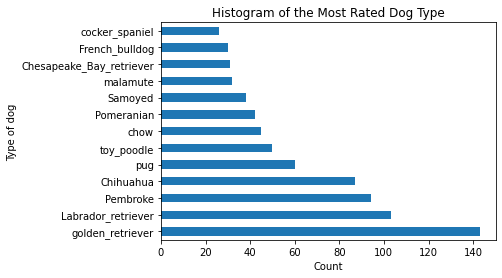

In [87]:
df_dog_type = df_twitter.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

In [88]:
df_twitter1.sample(20)

,tweet_id,text,rating_numerator,rating_denominator,rating,name,dogs_stage,year,month,day,jpg_url,dog_type,confidence_list
460,709042156699303936,This is Klevin. He's addicted to sandwiches (y...,9.0,10.0,9.0,Klevin,None,2016,3,13,https://pbs.twimg.com/media/CdcGBB3WwAAGBuU.jpg,Rottweiler,0.0681793
1569,757725642876129280,This is Beckham. He fell asleep at the wheel. ...,11.0,10.0,11.0,Beckham,None,2016,7,25,https://pbs.twimg.com/media/CoP7c4bWcAAr55g.jpg,Labrador_retriever,0.128128
169,890006608113172480,This is Koda. He is a South Australian decksha...,13.0,10.0,13.0,Koda,None,2017,7,26,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,Samoyed,0.957979
1241,724046343203856385,This is Sarge. Not even he knows what his tong...,10.0,10.0,10.0,Sarge,None,2016,4,24,https://pbs.twimg.com/media/CgxUTS_XEAAC0pv.jpg,boxer,0.826272
1706,750132105863102464,This is Stewie. He will roundhouse kick anyone...,11.0,10.0,11.0,Stewie,None,2016,7,5,https://pbs.twimg.com/media/CmkBKuwWgAAamOI.jpg,toy_poodle,0.478018
1397,866686824827068416,This is Lili. She can't believe you betrayed h...,12.0,10.0,12.0,Lili,None,2017,5,22,https://pbs.twimg.com/media/DAcXEWuXkAIBDGJ.jpg,flat-coated_retriever,0.51473
224,691444869282295808,This is Bailey. She likes flowers. 12/10 https...,12.0,10.0,12.0,Bailey,None,2016,1,25,https://pbs.twimg.com/media/CZiBcJhWQAATXNK.jpg,Bernese_mountain_dog,0.767563
1538,833722901757046785,This is Bronte. She's fairly h*ckin aerodynami...,13.0,10.0,13.0,Bronte,None,2017,2,20,https://pbs.twimg.com/media/C5H6jmgW8AAevqq.jpg,West_Highland_white_terrier,0.918144
1174,817536400337801217,Say hello to Eugene &amp; Patti Melt. No matte...,12.0,10.0,12.0,Eugene,None,2017,1,7,https://pbs.twimg.com/media/C1h4_MEXUAARxQF.jpg,pug,0.971358
1908,854010172552949760,"At first I thought this was a shy doggo, but i...",11.0,10.0,11.0,None,floofer,2017,4,17,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,English_springer,0.354733


### Insight two
Japanese_spaniel has the lowest average rating
Clumber has the highest average rating

In [98]:
df_dog_type_mean = df_twitter.groupby('dog_type').mean()

In [99]:
df_dog_type_mean.head()

,tweet_id,rating_numerator,rating_denominator,rating,year,month,day,favorite_count,retweet_count,followers_count,friends_count
dog_type,,,,,,,,,,,
Afghan_hound,8.095999e+17,8.000000,10.0,8.000000,2016.500000,6.00,16.000000,10756.500000,2995.500000,8.978272e+06,16.0
Airedale,7.184489e+17,9.833333,10.0,9.833333,2015.583333,8.75,15.916667,4657.583333,1171.666667,8.978282e+06,16.0
American_Staffordshire_terrier,7.597284e+17,10.312500,10.0,10.312500,2016.187500,5.25,15.000000,7458.733333,1730.466667,8.978278e+06,16.0
Appenzeller,7.939334e+17,11.000000,10.0,11.000000,2016.500000,4.50,18.500000,6483.500000,1202.500000,8.978276e+06,16.0
Australian_terrier,7.785921e+17,11.500000,10.0,11.500000,2016.500000,3.50,7.000000,9873.000000,2609.000000,8.978276e+06,16.0


In [102]:
df_dog_type_sorted = df_dog_type_mean['rating'].sort_values()

df_dog_type_sorted

dog_type
Japanese_spaniel                5.000000
Afghan_hound                    8.000000
soft-coated_wheaten_terrier     8.800000
Walker_hound                    9.000000
Scotch_terrier                  9.000000
                                 ...    
Border_terrier                 12.142857
briard                         12.333333
Irish_setter                   12.333333
Saluki                         12.500000
Bouvier_des_Flandres           13.000000
Name: rating, Length: 113, dtype: float64

In [103]:
print(df_twitter.loc[df_twitter.dog_type == 'Japanese_spaniel', 'url']) 

710    https://t.co/IoLRvF0Kak
Name: url, dtype: object


In [104]:
df_twitter[df_twitter['dog_type'] == 'golden_retriever']

,tweet_id,text,rating_numerator,rating_denominator,rating,name,dogs_stage,year,month,day,jpg_url,dog_type,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
8,667530908589760512,Meet Naphaniel. He doesn't necessarily enjoy h...,10.0,10.0,10.0,Naphaniel,None,2015,11,20,https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg,golden_retriever,0.633037,432.0,218.0,8978292.0,16.0,Twitter Web Client,Original tweet,https://t.co/xoRWyQTcmy
30,667044094246576128,12/10 gimme now https://t.co/QZAnwgnOMB,12.0,10.0,12.0,None,None,2015,11,18,https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg,golden_retriever,0.765266,172.0,44.0,8978292.0,16.0,Twitter for iPhone,Original tweet,https://t.co/QZAnwgnOMB
37,667160273090932737,This is Bradlay. He is a Ronaldinho Matsuyama ...,11.0,10.0,11.0,Bradlay,None,2015,11,19,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,golden_retriever,0.471351,232.0,55.0,8978292.0,16.0,Twitter for iPhone,Original tweet,https://t.co/DKhgkMx4N1
43,667182792070062081,This is Timison. He just told an awful joke bu...,10.0,10.0,10.0,Timison,None,2015,11,19,https://pbs.twimg.com/media/CUJPNjOWsAAZRqP.jpg,golden_retriever,0.949892,13112.0,5554.0,8978292.0,16.0,Twitter for iPhone,Original tweet,https://t.co/s2yYuHabWl
46,667211855547486208,This is Genevieve. She is a golden retriever c...,9.0,10.0,9.0,Genevieve,None,2015,11,19,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,golden_retriever,0.462556,444.0,220.0,8978292.0,16.0,Twitter for iPhone,Original tweet,https://t.co/azEoGqVonH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,693262851218264065,I hope you guys enjoy this beautiful snowy pup...,11.0,10.0,11.0,None,pupper,2016,1,30,https://pbs.twimg.com/media/CZ724fDUYAAytS-.jpg,golden_retriever,0.989333,2120.0,474.0,8978280.0,16.0,Twitter for iPhone,Original tweet,https://t.co/DYUsHtL2aR
1589,675740360753160193,Here's a pupper licking in slow motion. 12/10 ...,12.0,10.0,12.0,None,pupper,2015,12,12,https://pbs.twimg.com/ext_tw_video_thumb/67574...,golden_retriever,0.800495,1107.0,316.0,8978291.0,16.0,Twitter for iPhone,Original tweet,https://t.co/AUJi8ujxw9
1599,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",12.0,10.0,12.0,Maggie,pupper,2016,7,31,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,golden_retriever,0.985876,5792.0,1843.0,8978273.0,16.0,Twitter for iPhone,Original tweet,https://t.co/MYwR4DQKll
1616,859607811541651456,Sorry for the lack of posts today. I came home...,13.0,10.0,13.0,None,puppo,2017,5,3,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,golden_retriever,0.895529,17401.0,1410.0,8978271.0,16.0,Twitter for iPhone,Original tweet,https://t.co/GL6vzAbHrv


### Insight three & visualization
- The highest ratings do not receive the most retweets.

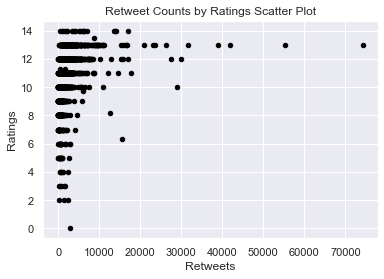

In [154]:
df_twitter.plot(x='retweet_count', y='rating', kind='scatter',color="black")
plt.xlabel('Retweets')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('output3.png',bbox_inches='tight');

### Insight four & visualization
- Dog_types with low number of ratings show a high variaty of mean ratings. 

In [94]:
df_dog_type_count = df_twitter.groupby('dog_type').count()
df_dog_type_count

,tweet_id,text,rating_numerator,rating_denominator,rating,name,dogs_stage,year,month,day,jpg_url,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
dog_type,,,,,,,,,,,,,,,,,,,
Afghan_hound,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Airedale,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
American_Staffordshire_terrier,16,16,16,16,16,16,16,16,16,16,16,16,15,15,15,15,15,15,15
Appenzeller,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Australian_terrier,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
toy_poodle,50,50,50,50,50,50,50,50,50,50,50,50,49,49,49,49,49,49,49
toy_terrier,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
vizsla,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [95]:
dog_type_count = df_dog_type_count['rating']
dog_type_mean = df_dog_type_mean['rating']
dog_type_mean

dog_type
Afghan_hound                       8.000000
Airedale                           9.833333
American_Staffordshire_terrier    10.312500
Appenzeller                       11.000000
Australian_terrier                11.500000
                                    ...    
toy_poodle                        11.020000
toy_terrier                       10.333333
vizsla                            10.846154
whippet                           10.181818
wire-haired_fox_terrier           11.500000
Name: rating, Length: 113, dtype: float64

In [96]:
df = pd.DataFrame()
df['dog_type_count'] = dog_type_count
df['dog_type_mean'] = dog_type_mean
df

,dog_type_count,dog_type_mean
dog_type,,
Afghan_hound,2,8.000000
Airedale,12,9.833333
American_Staffordshire_terrier,16,10.312500
Appenzeller,2,11.000000
Australian_terrier,2,11.500000
...,...,...
toy_poodle,50,11.020000
toy_terrier,3,10.333333
vizsla,13,10.846154


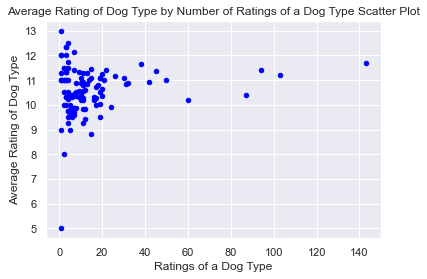

In [150]:
df.plot(x='dog_type_count' , y='dog_type_mean', kind='scatter',color="blue")
plt.xlabel('Ratings of a Dog Type')
plt.ylabel('Average Rating of Dog Type')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog Type Scatter Plot')

fig = plt.gcf()
#plt.savefig('X:/' + newName + '.png', 
fig.savefig('output2.png',bbox_inches='tight');

### Insight five & visualization
- distribution of dog stages

In [109]:
df_twitter.sample(25)

,tweet_id,text,rating_numerator,rating_denominator,rating,name,dogs_stage,year,month,day,jpg_url,dog_type,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
576,793256262322548741,Oh h*ck look at this spookling right here. Fri...,12.0,10.0,12.0,None,NaN,2016,11,1,https://pbs.twimg.com/media/CwI2XCvXEAEO8mc.jpg,basset,0.207622,19691.0,8184.0,8978361.0,16.0,Twitter for iPhone,Original tweet,https://t.co/BNy9IIJMb0
1495,668986018524233728,This is Ruby. She's a Bimmington Fettuccini. O...,9.0,10.0,9.0,Ruby,NaN,2015,11,24,https://pbs.twimg.com/media/CUi3PIrWoAAPvPT.jpg,Chihuahua,0.00563972,510.0,149.0,8978330.0,16.0,Twitter for iPhone,Original tweet,https://t.co/j0Wpa42KCH
1424,670811965569282048,Meet Maggie. She enjoys her stick in the yard....,10.0,10.0,10.0,Maggie,NaN,2015,11,29,https://pbs.twimg.com/media/CU8z65IUEAQBc4q.jpg,basset,0.99409,1043.0,244.0,8978332.0,16.0,Twitter for iPhone,Original tweet,https://t.co/eYP9i9gfYn
710,759197388317847553,This is Luna. She's just heckin precious af I ...,12.0,10.0,12.0,Luna,NaN,2016,7,30,https://pbs.twimg.com/media/Cok1_sjXgAU3xpp.jpg,kuvasz,0.511341,5909.0,1881.0,8978361.0,16.0,Twitter for iPhone,Original tweet,https://t.co/gQH2mmKIJW
1181,681523177663676416,This is Carly. She's actually 2 dogs fused tog...,12.0,10.0,12.0,Carly,NaN,2015,12,28,https://pbs.twimg.com/media/CXVBtX_WwAEuqbP.jpg,Norfolk_terrier,0.205067,13679.0,5465.0,8978367.0,16.0,Twitter for iPhone,Original tweet,https://t.co/GQn2IopLud
1180,681579835668455424,This is Apollo. He thought you weren't coming ...,8.0,10.0,8.0,Apollo,NaN,2015,12,28,https://pbs.twimg.com/media/CXV1Ot_W8AEpkQO.jpg,Rottweiler,0.760671,3397.0,1237.0,8978367.0,16.0,Twitter for iPhone,Original tweet,https://t.co/ojUBrDCHLT
398,843235543001513987,This is Tycho. She just had new wheels install...,13.0,10.0,13.0,Tycho,NaN,2017,3,18,https://pbs.twimg.com/media/C7PGQJAWwAAibui.jpg,Pembroke,0.958452,20716.0,5684.0,8978361.0,16.0,Twitter for iPhone,Original tweet,https://t.co/E1nJycIG61
805,740214038584557568,This is getting incredibly frustrating. This i...,10.0,10.0,10.0,getting,NaN,2016,6,7,https://pbs.twimg.com/media/CkXEu2OUoAAs8yU.jpg,Chesapeake_Bay_retriever,0.586414,6433.0,1872.0,8978367.0,16.0,Twitter for iPhone,Original tweet,https://t.co/0yolOOyD3X
988,703774238772166656,"""YOU CAN'T HANDLE THE TRUTH"" both 10/10 https:...",10.0,10.0,10.0,None,NaN,2016,2,28,https://pbs.twimg.com/media/CcRO8FmW4AAzazk.jpg,Labrador_retriever,0.990119,1774.0,435.0,8978368.0,16.0,Twitter for iPhone,Original tweet,https://t.co/ZvxdB4i9AG
347,860563773140209665,Meet Lorenzo. He's an avid nifty hat wearer an...,13.0,10.0,13.0,Lorenzo,NaN,2017,5,5,https://pbs.twimg.com/media/C_FWL0vVwAA13N7.jpg,Cardigan,0.583936,6963.0,1935.0,8978361.0,16.0,Twitter for iPhone,Original tweet,https://t.co/xml5aIGWxv


Text(0.5, 1.0, 'The Distribution of Dog Stages')

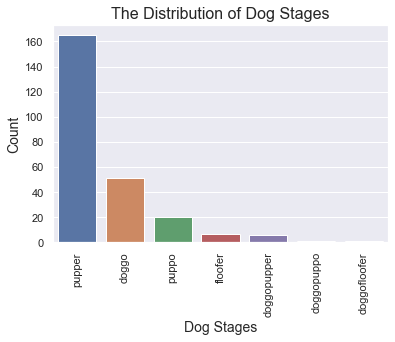

In [220]:
sorted_stage = df_twitter['dogs_stage'].value_counts().index
sns.set(style="darkgrid")
sns.countplot(data = df_twitter, x = 'dogs_stage', order = sorted_stage, orient = 'h')
plt.xticks(rotation = 90)
plt.xlabel('Dog Stages', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Distribution of Dog Stages',fontsize=16)
